## Text Mining

![miners](img/text-miners.jpeg)

## Part 1

### Situation:

![greg](img/thinking.jpeg)

Last week we helped Greg build a model to sort through articles, but we rushed through the pre-processing of it all. This lesson we will go through it step by step.

### Discussion

- What type of problem is this?
- What are we trying to do?
- What steps do you think might be involved? (big picture steps)

![talk](https://media.giphy.com/media/l2SpQRuCQzY1RXHqM/giphy.gif)

### **Goal**: to internalize the steps, challenges, and methodology of text mining
- explore text analysis by hand
- apply text mining steps in Jupyter with Python libraries NLTK
- classify documents correctly

#### How is text mining different? What is text?

- Order the words from **SMALLEST** to **LARGEST** units
 - character
 - corpora
 - sentence
 - word
 - corpus
 - paragraph
 - document

(after it is all organized)

- Any disagreements about the terms used?

### Steps with articles:

https://github.com/aapeebles/text_examples 

1. Create list of words
2. tally how many times words are used
3. order the words by frequency
4. try to find similar articles in the group using only your frequencies 


Yes, the list might might be long.
![list](https://media.giphy.com/media/YLHwkqayc1j7a/giphy.gif)

DISCUSS!

### Bag of Words Steps

<img style="float: left" src="./img/bag_of_word.jpg" width="200">

![step by step](https://i.gifer.com/VxbJ.gif)

1. make all lower case
2. Remove punctuation, numbers, symbols, etc
3. Remove stop words, perhaps develop custom stop words list
4. Stemming/Lemmatization


But what about tokenization? when's the best time to tokenize?

## New library!

while we have seen language processing tools in spark, NLTK is its own python library. And of course, it has its own [documentation](https://www.nltk.org/)

In [2]:
import nltk
import sklearn
#from __future__ import print_function

In [3]:
nltk.download() #for when you are bringing in files from gutenburg, etf

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
import urllib

In [6]:
#print(tokens[:100])

In [7]:
metamorph = urllib.request.urlopen('http://www.gutenberg.org/cache/epub/5200/pg5200.txt').read()
#print(x.read())


In [10]:
print(metamorph)

b'\xef\xbb\xbfThe Project Gutenberg EBook of Metamorphosis, by Franz Kafka\r\nTranslated by David Wyllie.\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **\r\n**     Please follow the copyright guidelines in this file.     **\r\n\r\n\r\nTitle: Metamorphosis\r\n\r\nAuthor: Franz Kafka\r\n\r\nTranslator: David Wyllie\r\n\r\nRelease Date: August 16, 2005 [EBook #5200]\r\nFirst posted: May 13, 2002\r\nLast updated: May 20, 2012\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***\r\n\r\n\r\n\r\n\r\nCopyright (C) 2002 David Wyllie.\r\n\r\n\r\n\r\n\r\n\r\n  Metamorphosis\r\n  Franz Kafka\r\n\r\nTranslated by David Wyllie\r\n\r\n\r\n\r\nI\r\n\r\n\r\nOne morning, when

In [11]:
metamorph_st = metamorph.decode("utf-8") 

In [12]:
print(metamorph_st)

﻿The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***




Copyright (C) 2002 David Wyllie.





  Metamorphosis
  Franz Kafka

Translated by David Wyllie



I


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lif

Load your article here

In [13]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
metamorph_tokens_raw = nltk.regexp_tokenize(metamorph_st, pattern)
print(metamorph_tokens_raw[:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'Title', 'Metamorphosis', 'Author', 'Franz', 'Kafka', 'Translator', 'David', 'Wyllie', 'Release', 'Date', 'August', 'EBook', 'First', 'posted', 'May', 'Last', 'updated', 'May', 'Language', 'English', 'START', 'OF', 'THIS']


In [14]:
metamorph_tokens = [i.lower() for i in metamorph_tokens_raw]
print(metamorph_tokens[:100])


['the', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosis', 'by', 'franz', 'kafka', 'translated', 'by', 'david', 'wyllie', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'this', 'is', 'a', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'below', 'please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'of', 'this']


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/j.markdaniels/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
stop_words = set(stopwords.words('english'))
metamorph_tokens_stopped = [w for w in metamorph_tokens if not w in stop_words]
print(metamorph_tokens_stopped[:100])

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'net', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'please', 'follow', 'copyright', 'guidelines', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'copyright', 'c', 'david', 'wyllie', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armour', 'like', 'back', 'lifted', 'head', 'little', 'could', 'see

## Stemming / Lemming

### Stemming - Porter Stemmer 
![porter](https://cdn.homebrewersassociation.org/wp-content/uploads/Baltic_Porter_Feature-600x800.jpg)

In [19]:
from nltk.stem import *
stemmer = PorterStemmer()
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
           'died', 'agreed', 'owned', 'humbled', 'sized',
           'meeting', 'stating', 'siezing', 'itemization',
           'sensational', 'traditional', 'reference', 'colonizer',
          'plotted']

In [20]:
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


### Stemming - Snowball Stemmer
![snowball](https://localtvwiti.files.wordpress.com/2018/08/gettyimages-936380496.jpg?quality=85&strip=all)

In [21]:
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [22]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("running"))

run


### Porter vs Snowball

In [23]:
print(SnowballStemmer("english").stem("generously"))
print(SnowballStemmer("porter").stem("generously"))



generous
gener


### Use Snowball on metamorphesis

In [24]:
meta_stemmed = [stemmer.stem(word) for word in metamorph_tokens_stopped]
print(meta_stemmed[:100])

['project', 'gutenberg', 'ebook', 'metamorphosi', 'franz', 'kafka', 'translat', 'david', 'wylli', 'ebook', 'use', 'anyon', 'anywher', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'net', 'copyright', 'project', 'gutenberg', 'ebook', 'detail', 'pleas', 'follow', 'copyright', 'guidelin', 'file', 'titl', 'metamorphosi', 'author', 'franz', 'kafka', 'translat', 'david', 'wylli', 'releas', 'date', 'august', 'ebook', 'first', 'post', 'may', 'last', 'updat', 'may', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosi', 'copyright', 'c', 'david', 'wylli', 'metamorphosi', 'franz', 'kafka', 'translat', 'david', 'wylli', 'one', 'morn', 'gregor', 'samsa', 'woke', 'troubl', 'dream', 'found', 'transform', 'bed', 'horribl', 'vermin', 'lay', 'armour', 'like', 'back', 'lift', 'head', 'littl', 'could', 'see', 'brown', 'belli']


### Lemmatization

Uses a corpus of words "WordNet"

`from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()`


Challenge of lemmatization:

`wordnet_lemmatizer.lemmatize(word, pos="v")`

## Here is a short list of additional considerations when cleaning text:

- Handling large documents and large collections of text documents that do not fit into memory.
- Extracting text from markup like HTML, PDF, or other structured document formats.
- Transliteration of characters from other languages into English.
- Decoding Unicode characters into a normalized form, such as UTF8.
- Handling of domain specific words, phrases, and acronyms.
- Handling or removing numbers, such as dates and amounts.
- Locating and correcting common typos and misspellings.

### Document statistics

Average word length in document

In [25]:
float(sum(map(len, meta_stemmed))) / len(meta_stemmed)

5.062374245472837

Number of words in document

In [26]:
len(meta_stemmed)

11928

## What you've all been waiting for 

![big deal](http://reddebtedstepchild.com/wp-content/uploads/2013/04/Big-deal-gif.gif)


## Frequency distributions

In [27]:
meta_freqdist = FreqDist(meta_stemmed)

In [28]:
meta_freqdist.most_common(50)

[('gregor', 298),
 ('would', 187),
 ('room', 133),
 ('could', 120),
 ('work', 114),
 ('even', 104),
 ('father', 102),
 ('sister', 101),
 ('door', 97),
 ('gutenberg', 94),
 ('mother', 90),
 ('project', 88),
 ('back', 83),
 ('one', 76),
 ('time', 74),
 ('way', 66),
 ('look', 61),
 ('tm', 57),
 ('open', 56),
 ('use', 55),
 ('get', 52),
 ('said', 51),
 ('littl', 49),
 ('go', 49),
 ('without', 47),
 ('first', 45),
 ('still', 45),
 ('want', 44),
 ('like', 43),
 ('see', 42),
 ('hand', 41),
 ('made', 40),
 ('make', 40),
 ('head', 39),
 ('much', 39),
 ('come', 39),
 ('day', 38),
 ('thing', 38),
 ('move', 38),
 ('chief', 38),
 ('thought', 37),
 ('clerk', 37),
 ('turn', 36),
 ('away', 35),
 ('samsa', 34),
 ('let', 33),
 ('bed', 32),
 ('well', 32),
 ('went', 32),
 ('famili', 32)]

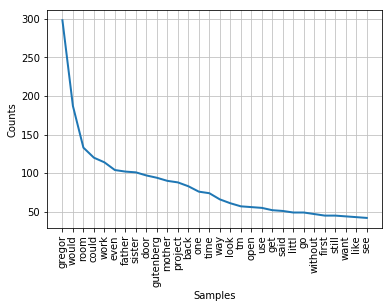

In [32]:


meta_freqdist.plot(30,cumulative=False)

**TASK**: Create word frequency plot for your article

Question:  Should any more stop words be added to the list given your plot results?

In [33]:
meta_finder = BigramCollocationFinder.from_words(meta_stemmed)

## Creating a Data frame that compares the documents

**Puzzle**: how could you adapt the code below to allow you to compare documents and word counts?

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

docs = ['why hello there', 'omg hello pony', 'she went there? omg']
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

   hello  omg  pony  she  there  went  why
0      1    0     0    0      1     0    1
1      1    1     1    0      0     0    0
2      0    1     0    1      1     1    0
